!pip install treeinterpreter

!pip install waterfallcharts

!pip install pdpbox

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.5
pandas version :  1.4.2
seaborn version :  0.11.2


In [2]:
train = pd.read_csv('train.csv')
train.head(5)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#  Preliminary Look and Data Cleansing

In [3]:
train.sample(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
32027,32028,Female,67,1,46.0,1,1-2 Year,No,2630.0,122.0,263,0
377323,377324,Female,56,1,28.0,0,> 2 Years,Yes,37344.0,26.0,87,0
110914,110915,Female,22,1,28.0,1,< 1 Year,No,60041.0,152.0,150,0
140109,140110,Female,55,1,28.0,0,1-2 Year,Yes,26459.0,122.0,120,0
162020,162021,Male,61,1,48.0,0,1-2 Year,Yes,2630.0,124.0,78,1
247407,247408,Female,76,1,19.0,1,1-2 Year,No,2630.0,124.0,100,0
32061,32062,Female,25,1,6.0,1,< 1 Year,No,24250.0,152.0,131,0
273158,273159,Female,41,1,47.0,0,> 2 Years,Yes,28545.0,124.0,205,1
231996,231997,Female,30,1,41.0,1,< 1 Year,No,21917.0,152.0,180,0
39342,39343,Female,23,1,30.0,1,< 1 Year,No,22257.0,152.0,106,0


Observations:
1.  the columns in the table consist of numeric columns and categorical columns
2. there is multiple column seems to contain two or three distinct values , but will confirm later
3. `Driving_License	`, `Previously_Insured` and `Response` is apparently also binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good

## General Information & Missing Values

### drop kolom `ID`

In [4]:
train = train.drop('id', axis=1)
# kita drop kolom 'id'

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


Observation:
1. Data contains 11 columns with 381109 rows
2. there is no columns have missing values 
3. All dtypes seem OK (appropriate), given the corresponding column name

### missing value check

In [6]:
# number of missing values per column
train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

- there is no missing values

In [7]:
train.duplicated().sum()

269

In [8]:
train=train.drop_duplicates()

- there are had 269 row duplicated values and drop already

# Data understanding

## Statistical summary

In [9]:
numerical_train = train.select_dtypes("number")
numerical_train.describe()
# mengelempokan data yang memiliki dtype angka(float,integer) menjadi data frame baru dengan nama numerical_data
#melihat nilai statistikal pada masing2 kolom di numerica_data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Observation:
* secara keseluruhan nilai maximum dan minimum setiap kolom masih masuk akal
* `Driving_License`,`Previously_Insured`,`Response` adalah kolom bolean sehingga selama data nya masih bernilai 1 dan 0 tidak perlu menyimpulkan kesimetrisan .
* nilai mean mendekati nilai dari median(50%) pada kolom `Age`,`Region_Code`,`Annual_Premium`,`Vintage` maka data menunjukan distribusi yang simetris
* karna nilai mean tidak mendekati nilai dari median(50%) pada kolom `Policy_Sales_Channel` maka data tidak menunjukan distribusi yang simetris

In [10]:
categoricals_train = train.select_dtypes(object)
categoricals_train.describe()
# mengelempokan data yang memiliki dtype object menjadi data frame baru dengan nama categoricals
#melihat describe pada data categoricals

,Gender,Vehicle_Age,Vehicle_Damage
count,380840,380840,380840
unique,2,3,2
top,Male,1-2 Year,Yes
freq,205938,200167,192277


Observations:
* pada umumnya semua kolom pada data hanya memiliki 2 atau 3 unique value seperti pada kolom `gender` yang hanya punya nilai male dan female atau pada kolom `Vehicle_Damage` yang hanya punya nilai yes dan no

In [11]:
for col in categoricals_train.columns:
  print(f"Value counts of {col} column")
  print(train[col].value_counts(), '\n')
    
#melihat unique value pada masing2 kolom 

Value counts of Gender column
Male      205938
Female    174902
Name: Gender, dtype: int64 

Value counts of Vehicle_Age column
1-2 Year     200167
< 1 Year     164671
> 2 Years     16002
Name: Vehicle_Age, dtype: int64 

Value counts of Vehicle_Damage column
Yes    192277
No     188563
Name: Vehicle_Damage, dtype: int64 



# Univariate Analysis

## Boxplot to detect outliers

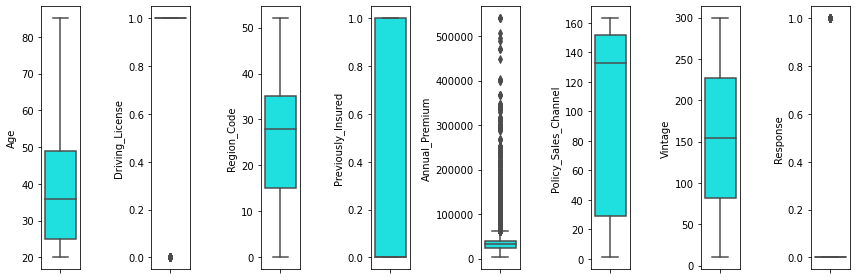

In [12]:
plt.figure(figsize=(12,4))

# plotting
features = numerical_train.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=train[features[i]], color='cyan')
    plt.tight_layout()

- pada boxplot dapat dilihat bahwa adanya outlier pada kolom `Annual_Premium` yang mana akan di handle nantinya
- outlier pada kolom `Driving_License` dan `Response` dapat di terima karena data hanya bernilai 0 dan 1

# Melihat Sebaran Data 

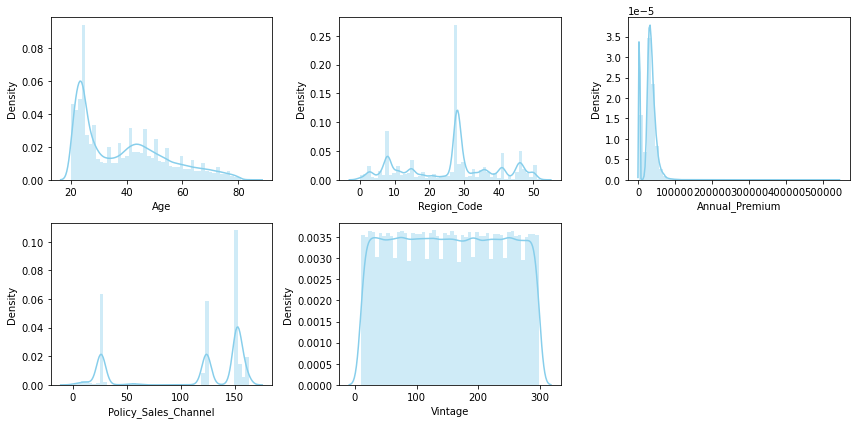

In [13]:
plt.figure(figsize=(12,6))

features = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=train[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

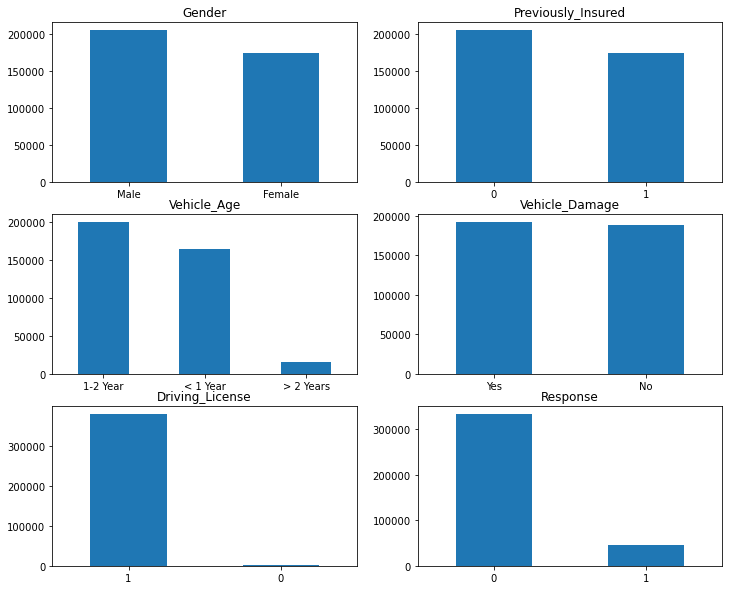

In [25]:
services = ['Gender', 'Vehicle_Age','Driving_License','Previously_Insured','Vehicle_Damage','Response'] 
fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (12,10))
for i, item in enumerate(services):
    if i < 3:
        ax = train[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = train[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
    ax.set_title(item)   

# Bivariate Analysis

## Age with response

<AxesSubplot:xlabel='Age', ylabel='Count'>

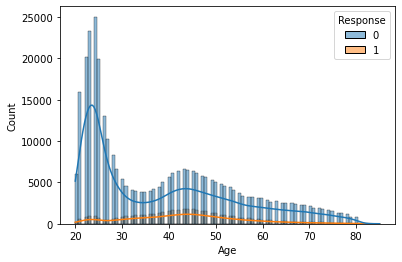

In [14]:
sns.histplot(data=train, x="Age", hue="Response",  kde=True)

In [15]:
train.loc[train['Age']<=35, 'age_group'] = '20-35'
train.loc[train['Age'].between(36,55), 'age_group'] = '36-55'
train.loc[train['Age']>55, 'age_group'] = '>55'

In [16]:
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
250678,Female,23,1,15.0,1,< 1 Year,No,29786.0,152.0,63,0,20-35
124772,Male,24,1,25.0,0,< 1 Year,No,30833.0,152.0,219,0,20-35
75477,Female,40,1,28.0,0,1-2 Year,Yes,2630.0,124.0,89,0,36-55
277761,Male,59,1,28.0,1,1-2 Year,No,49934.0,124.0,138,0,>55
249809,Male,50,1,14.0,0,> 2 Years,Yes,29353.0,26.0,46,1,36-55


<AxesSubplot:xlabel='age_group'>

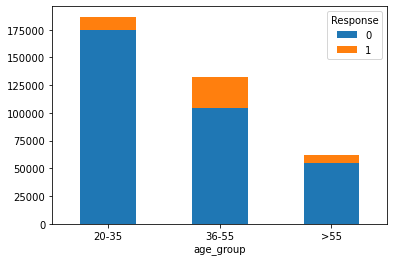

In [17]:
pd.crosstab(train.age_group, train.Response ).plot.bar(stacked=True,rot=0)


## Annual Premium with response

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

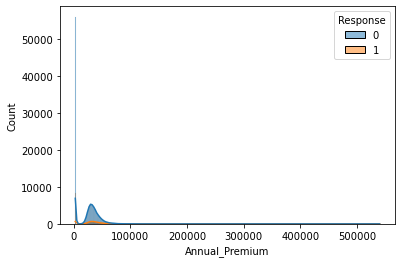

In [18]:
sns.histplot(data=train, x="Annual_Premium", hue="Response",  kde=True)

In [19]:
train3=train[train["Annual_Premium"]<=100000]

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

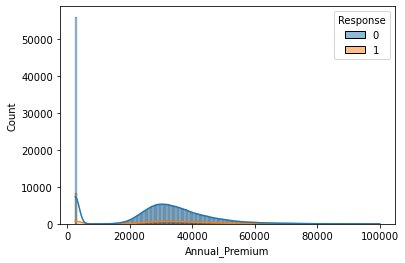

In [20]:
sns.histplot(data=train3, x="Annual_Premium", hue="Response",  kde=True)

In [21]:
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
202548,Male,49,1,28.0,0,1-2 Year,Yes,34961.0,26.0,54,0,36-55
8595,Male,42,1,28.0,0,1-2 Year,Yes,2630.0,124.0,113,0,36-55
102098,Female,80,1,28.0,0,1-2 Year,Yes,33418.0,26.0,107,0,>55
117510,Male,50,1,46.0,0,1-2 Year,No,24610.0,124.0,239,0,36-55
66642,Male,28,1,13.0,0,< 1 Year,No,22435.0,152.0,267,0,20-35


## vintage with response

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

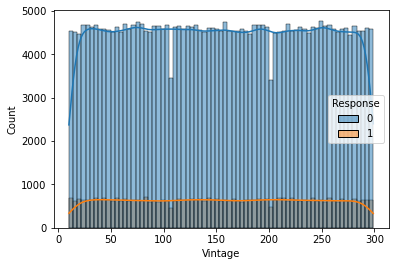

In [22]:
sns.histplot(data=train3, x="Vintage", hue="Response",  kde=True)

# Policy_Sales_Channel

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

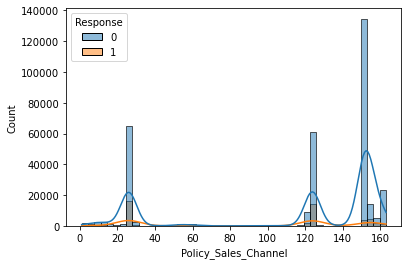

In [23]:
sns.histplot(data=train3, x="Policy_Sales_Channel", hue="Response",  kde=True)

## Region_Code with response 

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

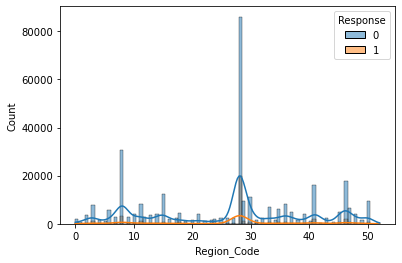

In [24]:
sns.histplot(data=train3, x="Region_Code", hue="Response",  kde=True)

## Table Categorical 

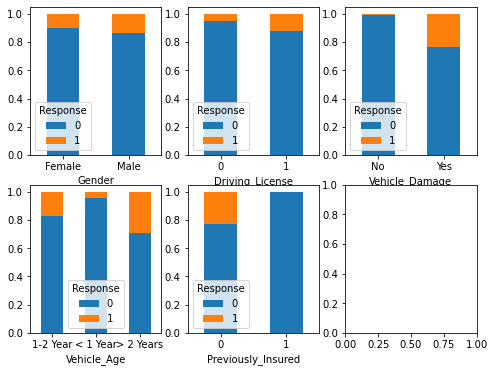

In [27]:
services = ['Gender', 'Vehicle_Age','Driving_License','Previously_Insured','Vehicle_Damage']
fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (8,6))
for i, item in enumerate(services):
    if i < 2:
        item = pd.crosstab(train[item],train['Response'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i,0],rot = 0)
        
        
    elif i >=2 and i < 4:
        item = pd.crosstab(train[item],train['Response'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i-2,1],rot = 0)
        
        
    elif i >=4 and i < 6:
        item = pd.crosstab(train[item],train['Response'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i-4,2],rot = 0)
       
    


<AxesSubplot:>

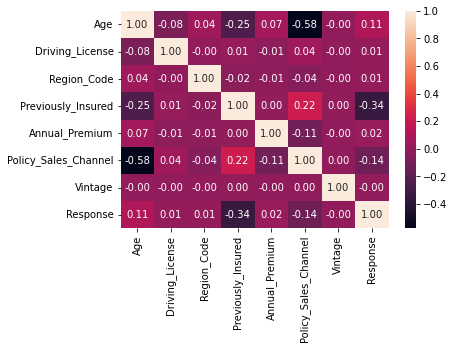

In [26]:
# correlation heatmap
correlation = train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

OBSERVASI
- Gender tidak mempengaruhi response pelanggan
- pelanggan yang belum memiliki asuransi kendaraan lebih berminat untuk berlangganan asuransi
- pelanggan dengan pemakaian kendaraan diatas 2 tahun lebih banyak tertarik untuk meng asuransikan kendaraan nya
-kendaraan yang sudah pernah mengalami kecelakaan lebih banyak yang tertarik untuk mengasuransikan kendaraan nya
- pelanggan yang mempunyai driving license lebih banyak yang mengasuransikan kendaraan nya

# Questions

## 1. pada umur kendaraan berapa biasa nya pelanggan pernah mengalami tabrakan mobil?

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

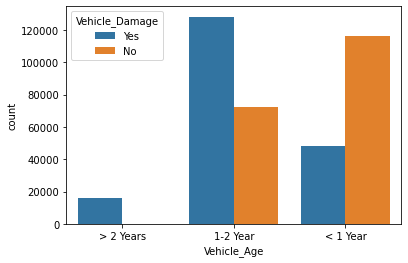

In [28]:
# research_exp affect admit_status?
sns.countplot(data=train,
            x='Vehicle_Age',
            hue='Vehicle_Damage')

## 2. 10 kode region mana saja dengan pelanggan terbanyak?

In [29]:
top10_prod = (train
            .groupby('Region_Code')
            .agg(num_trx=('Region_Code','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
prod = (train
            .groupby('Region_Code')
            .agg(trx=('Region_Code','count'))
            .reset_index()
            .sort_values('trx',ascending=False)
            
            )
top10_prod


,Region_Code,num_trx
28,28.0,106335
8,8.0,33857
46,46.0,19747
41,41.0,18256
15,15.0,13300
30,30.0,12177
29,29.0,11052
50,50.0,10237
3,3.0,9245
11,11.0,9229


In [30]:
df=top10_prod[['num_trx']]
df['cumperc'] = df['num_trx'].cumsum()/prod['trx'].sum()*100
df.index = ['28','8','46','41','15','30','29','50','3','11',]
df

,num_trx,cumperc
28,106335,27.921174
8,33857,36.811259
46,19747,41.996376
41,18256,46.789991
15,13300,50.282271
30,12177,53.479677
29,11052,56.381683
50,10237,59.069688
3,9245,61.497217
11,9229,63.920544


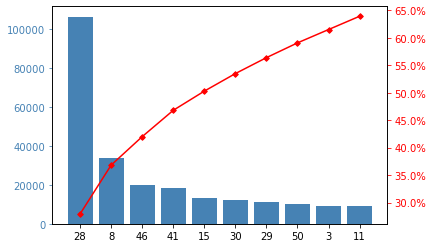

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['num_trx'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

## 3. premium mana yang paling diminati pelanggan?


In [32]:
train['Annual_Premium'].value_counts()
Premium = (train
            .groupby(['Annual_Premium','Response'])
            .agg(response=('Response','count'))
            .reset_index()
            .sort_values('response',ascending=False)
            .head(2)
            )

Premium

,Annual_Premium,Response,response
0,2630.0,0,56128
1,2630.0,1,8481


In [33]:
a=train[train['Annual_Premium']==2630.0]
a.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0,20-35
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1,36-55
30,Female,26,1,8.0,0,< 1 Year,No,2630.0,160.0,136,0,20-35
43,Female,38,1,35.0,1,1-2 Year,No,2630.0,152.0,153,0,36-55
58,Female,62,1,48.0,0,1-2 Year,Yes,2630.0,15.0,295,0,>55


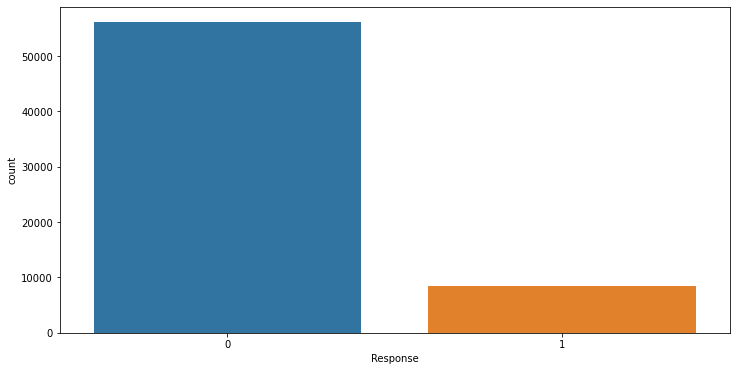

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(a.Response)
plt.show()

## 4. 10 nomor Policy Sales Channel mana saja yang sangat disukai pelanggan dan effective untuk memberikan respon berlangganan?

In [35]:
b=train[train['Response']==1]
b.head()
Channel2 = (b
            .groupby('Policy_Sales_Channel')
            .agg(response=('Response','count'))
            .reset_index()
            .sort_values('response',ascending=False)
            .head(10)
            )
Channel2

,Policy_Sales_Channel,response
23,26.0,15881
92,124.0,13984
111,152.0,3858
115,156.0,2296
116,157.0,1792
90,122.0,1720
113,154.0,1474
120,163.0,880
119,160.0,475
114,155.0,395


In [36]:
Channel2['response'].sum()/train['Response'].count()*100

11.226499317298604

In [37]:

Channel = (train
            .groupby('Policy_Sales_Channel')
            .agg(response=('Response','count'))
            .reset_index()
            .sort_values('response',ascending=False)
            .head(10)
            )
Channel


,Policy_Sales_Channel,response
145,152.0,134680
24,26.0,79646
119,124.0,73928
153,160.0,21769
149,156.0,10642
117,122.0,9929
150,157.0,6677
147,154.0,5992
144,151.0,3884
154,163.0,2893


In [38]:
Channel['response'].sum()/train['Response'].count()*100

91.91261422119526

## BUSINESS RECOMENDATION

- dari data dapat dilihat bahwa pelanggan yang belum memiliki asuransi kendaraan lebih tertarik untuk mendapatkan asuransi kendaran dari perusahaan sehingg kita dapat lebih menggiatkan atau menargetkan promosi pada pelanggan yang belum memiliki asuransi kendaraan. jika kita lebih menargetkan kesana maka ada sekitar  206336 pelanggan yanng dapat ditarik dan ini kan berdampak besar pada perusahaan.
- karna banyaknya pelanggan yang memiliki umur kendaraan dibawah 2 tahun maka kita dapat lebih menggiatkan promosi pada kendraan dengan pemakaian 2 tahun kebawah dengan menampilkan data riwayat tabrakan per umur mobil atau dapat bekerjasama dengan showroom mobil untuk menyadarkan pentig nya asuransi mobil pada pelanggan yang baru membeli mobil
- kita dapat memfokuskan kepada 10 kode region tempat tinggal coustumer karna dari 10 kode region sudah mencakup 64 % dari pelanggan
- Sebagian besar pelanggan tertarik untuk membayar Premi Tahunan 2630 namun hanya 22% yang memberikan respon berlangganan dengan asuransi kendaraan dan sisanya 78% tidak memberikan respon berlangganan. 
- kita dapat memfokuskan promosi pada 10 `Policy_Sales_Channel` yang disukai pelanggan yang dapat menjangkau 91.9 % pelanggan namun baru memberikan 11.2% respon berlangganan 

In [39]:
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
103103,Female,21,1,35.0,1,< 1 Year,No,25739.0,159.0,82,0,20-35
294150,Male,43,1,50.0,0,1-2 Year,Yes,35649.0,26.0,18,0,36-55
137897,Male,20,1,43.0,1,< 1 Year,No,2630.0,160.0,65,0,20-35
120962,Male,54,1,28.0,0,> 2 Years,Yes,67347.0,26.0,214,0,36-55
190724,Male,58,1,37.0,0,1-2 Year,Yes,52473.0,26.0,270,0,>55


## Handle outlier 

In [40]:
Q1 = train['Annual_Premium'].quantile(0.25)
Q3 = train['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train['Annual_Premium'] < (Q1 - 1.5 * IQR)) |(train['Annual_Premium'] > (Q3 + 1.5 * IQR)))]


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370509 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370509 non-null  object 
 1   Age                   370509 non-null  int64  
 2   Driving_License       370509 non-null  int64  
 3   Region_Code           370509 non-null  float64
 4   Previously_Insured    370509 non-null  int64  
 5   Vehicle_Age           370509 non-null  object 
 6   Vehicle_Damage        370509 non-null  object 
 7   Annual_Premium        370509 non-null  float64
 8   Policy_Sales_Channel  370509 non-null  float64
 9   Vintage               370509 non-null  int64  
 10  Response              370509 non-null  int64  
 11  age_group             370509 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.7+ MB


## Melakukan one hot encoding

In [42]:
train['age_group'] = train['age_group'].replace(['>55'], '3')
train['age_group'] = train['age_group'].replace(['36-55'], '2')
train['age_group'] = train['age_group'].replace(['20-35'], '1')
train.head()
# merubah nilai data pada kolom depents dari 3+ menjadi 3

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,3
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1


In [43]:

train['Gender'] = train['Gender'].replace("Female", 0).replace("Male", 1)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,3
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1


In [44]:
train['Vehicle_Age'] = train['Vehicle_Age'].replace(['> 2 Years'], '3')
train['Vehicle_Age'] = train['Vehicle_Age'].replace(['1-2 Year'], '2')
train['Vehicle_Age'] = train['Vehicle_Age'].replace(['< 1 Year'], '1')
train.head()
# merubah nilai data pada kolom depents dari 3+ menjadi 3

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,1,44,1,28.0,0,3,Yes,40454.0,26.0,217,1,2
1,1,76,1,3.0,0,2,No,33536.0,26.0,183,0,3
2,1,47,1,28.0,0,3,Yes,38294.0,26.0,27,1,2
3,1,21,1,11.0,1,1,No,28619.0,152.0,203,0,1
4,0,29,1,41.0,1,1,No,27496.0,152.0,39,0,1


In [45]:

train['Vehicle_Damage'] = train['Vehicle_Damage'].replace("No", 0).replace("Yes", 1)
train.head()
#merubah nilai data gender female menjadi 0 dan male menjadi 1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,2
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,3
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,2
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,1


In [46]:
train=train.drop(['Age'], axis=1)

In [47]:
train.sample(3)

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
235350,1,1,33.0,1,1,0,28068.0,152.0,226,0,1
321484,1,1,29.0,0,2,1,41179.0,124.0,285,0,2
52527,0,1,28.0,1,1,0,37595.0,152.0,222,0,1


In [48]:

train['Vehicle_Age'] = train['Vehicle_Age'].astype(str).astype(int)
train['age_group'] = train['age_group'].astype(str).astype(int)


# Machine learning model

## Choose the appropriate metric for fitting the model 

In [49]:
train['Response'].value_counts()

0    325379
1     45130
Name: Response, dtype: int64

In [50]:
# import library
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(['Response'],axis = 1)
Y = train ['Response']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, Y_rus = rus.fit_resample(X, Y)

print(f'''Shape of X before under sampling : {X.shape}
Shape of X after under sampling : {X_rus.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_rus.value_counts(normalize=True) * 100

Shape of X before under sampling : (370509, 10)
Shape of X after under sampling : (90260, 10)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Response, dtype: float64

In [51]:
Y_rus.value_counts()

0    45130
1    45130
Name: Response, dtype: int64

## Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_rus, Y_rus, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
acc_rf=accuracy_score(y_test, y_pred)
f1_score_rf=f1_score(y_test, y_pred)
roc_rf=roc_auc_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
Precision_rf=precision_score(y_test,y_pred)

print('Akurasi',acc_rf)
print('f1-score', f1_score_rf)
print(f'Roc Score: {roc_rf}')


Akurasi 0.7863505428761356
f1-score 0.7987308479104914
Roc Score: 0.7865225739532041


In [54]:
# classification report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     11313
           1       0.75      0.85      0.80     11252

    accuracy                           0.79     22565
   macro avg       0.79      0.79      0.79     22565
weighted avg       0.79      0.79      0.79     22565



## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [56]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
acc_lr=accuracy_score(y_test, y_pred_reg)
f1_score_lr=f1_score(y_test,y_pred_reg)
roc_lr=roc_auc_score(y_test,y_pred_reg)
recall_lr=recall_score(y_test,y_pred_reg)
Precision_lr=precision_score(y_test,y_pred_reg)


print('Akurasi',acc_lr)
print('f1-score', f1_score_lr)
print(f'Roc Score: {roc_lr}')

Akurasi 0.585996011522269
f1-score 0.5309299056035348
Roc Score: 0.5856829396883163


In [58]:
# classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report


print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63     11313
           1       0.61      0.47      0.53     11252

    accuracy                           0.59     22565
   macro avg       0.59      0.59      0.58     22565
weighted avg       0.59      0.59      0.58     22565



## Decission Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [61]:
acc_dt=accuracy_score(y_test, y_pred_dt)
f1_score_dt=f1_score(y_test,y_pred_dt)
roc_dt=roc_auc_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
Precision_dt=precision_score(y_test,y_pred_dt)

print('Akurasi',acc_dt)
print('f1-score', f1_score_dt)
print(f'Roc Score: {roc_dt}')

Akurasi 0.7284289829381786
f1-score 0.7228403437358661
Roc Score: 0.7283797965268966


In [62]:
# classification report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report


print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     11313
           1       0.74      0.71      0.72     11252

    accuracy                           0.73     22565
   macro avg       0.73      0.73      0.73     22565
weighted avg       0.73      0.73      0.73     22565



## XG BOOST

In [63]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [64]:
y_pred_xg = model.predict(X_test)
y_pred_xg

array([1, 1, 0, ..., 1, 1, 1])

In [65]:
acc_xg=accuracy_score(y_test,  y_pred_xg)
f1_score_xg=f1_score(y_test, y_pred_xg)
roc_xg=roc_auc_score(y_test, y_pred_xg)
recall_xg=recall_score(y_test,y_pred_xg)
Precision_xg=precision_score(y_test,y_pred_xg)

print('Akurasi',acc_xg)
print('f1-score', f1_score_xg)
print(f'Roc Score: {roc_xg}')

Akurasi 0.7965876357190339
f1-score 0.8191204287515763
Roc Score: 0.7969302191725234


In [66]:
# classification report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report


print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77     11313
           1       0.74      0.92      0.82     11252

    accuracy                           0.80     22565
   macro avg       0.82      0.80      0.79     22565
weighted avg       0.82      0.80      0.79     22565



In [67]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({ 'Desision Tree Test':[acc_dt,roc_dt,recall_dt,Precision_dt,f1_score_dt],
        
        'Random Forest Test':[acc_rf,roc_rf,recall_rf,Precision_rf,f1_score_rf],
        
        'Logistic Reg Test':[acc_lr,roc_lr,recall_lr,Precision_lr,f1_score_lr],
        'Gradient Boosting Test':[acc_xg,roc_xg,recall_xg,Precision_xg,f1_score_xg ] },index=index )
round(data,2)
#dfi.export(a,'final.jpeg',max_rows=-1,max_cols=-1)


,Desision Tree Test,Random Forest Test,Logistic Reg Test,Gradient Boosting Test
Accuracy,0.73,0.79,0.59,0.80
AUC,0.73,0.79,0.59,0.80
Recall,0.71,0.85,0.47,0.92
Precision,0.74,0.75,0.61,0.74
F1 Score,0.72,0.80,0.53,0.82


## Hyperparameter tuning xgboost

In [68]:
#Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(X_train,y_train)

#parameters selected
rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

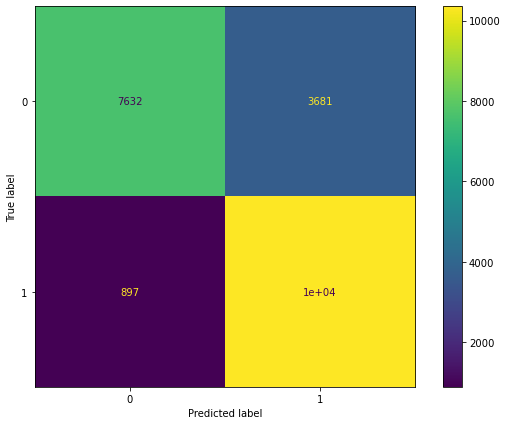

In [69]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rs_model.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rs_model.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rs_model.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [70]:
# classification report
from sklearn.metrics import classification_report
y_pred = rs_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     11313
           1       0.74      0.92      0.82     11252

    accuracy                           0.80     22565
   macro avg       0.82      0.80      0.79     22565
weighted avg       0.82      0.80      0.79     22565



In [71]:
# no skill
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

#Xgboost
y_probs= rs_model.best_estimator_.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_probs[:,1])

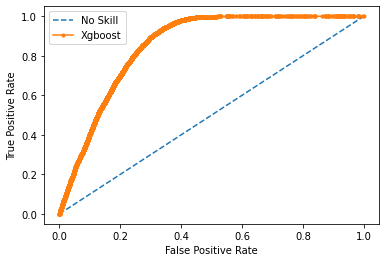

In [72]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Xgboost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

               Variable  Importance
3    Previously_Insured   53.458530
5        Vehicle_Damage   44.082596
9             age_group    0.833012
4           Vehicle_Age    0.705846
7  Policy_Sales_Channel    0.290488
1       Driving_License    0.250383
6        Annual_Premium    0.111789
8               Vintage    0.093607
2           Region_Code    0.091734
0                Gender    0.082007


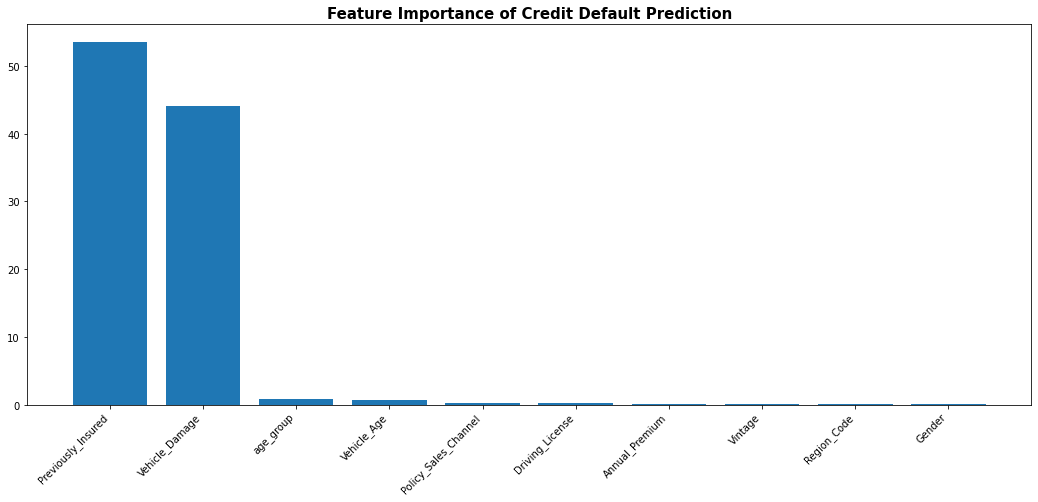

In [73]:
feature_importance = pd.DataFrame({'Variable':X_train.columns,
                      'Importance': rs_model.best_estimator_.feature_importances_*100}).sort_values('Importance', ascending=False)
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(feature_importance['Variable'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
ax.set_title('Feature Importance of Credit Default Prediction', fontsize=15, fontweight='bold')
plt.show
print(feature_importance)

from treeinterpreter import treeinterpreter as ti
import waterfall_chart

def create_contrbutions_df(row):
    row_value = X_test.values[[row]]
    prediction, bias, contributions = ti.predict( rs_model.best_estimator_, row_value)
    idxs = np.argsort(contributions[0][:][:,1])
    contrib_df = pd.DataFrame([o for o in zip(X_test.columns[idxs], X_test.iloc[row][idxs], contributions[0][:][idxs,1])])
    pred = contrib_df[2].sum()+bias[0][0]
    print (contrib_df)
    print ("bias :", bias[0][0])
    print ("contributions :", contrib_df[2].sum())
    print ("calculated prediction :", pred)
    print("final model prediction :", rs_model.best_estimator_.predict(X_test.values[[row]])[0])
    plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})
    my_plot=waterfall_chart.plot(contrib_df[0],contrib_df[2],sorted_value= True, rotation_value=90, threshold=0.1,formatting='{:,.3f}')
    

from pdpbox import pdp
from plotnine import *
from plotnine.data import mpg

# Work on a sample of the data for our visualizations
rand_sample = np.random.permutation(len(X_test))[:500]
df_sample = X_test.iloc[rand_sample]
features = X_test.columns



# Use the pdp library and define a plot_pdp function for our PDP visualization
def plot_pdp(feat):
    feat_name = feat
    p = pdp.pdp_isolate(model =  rs_model.best_estimator_, dataset=X_test.iloc[rand_sample], feature = feat, model_features = features)
    return pdp.pdp_plot(p, feat_name, plot_lines=True)

plot_pdp('Vehicle_Damage')
plt.show()

plot_pdp('Previously_Insured')
plt.show()

plot_pdp('age_group')
plt.show()
